# Data

In [ ]:
# import library
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
import bz2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the dataset
data = pd.read_csv('/content/drive/MyDrive/Sampel Data/Final Project/Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember: active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
data.describe(exclude = ['int64', 'float64'])

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


# Exploratory Data Analysis

<Axes: >

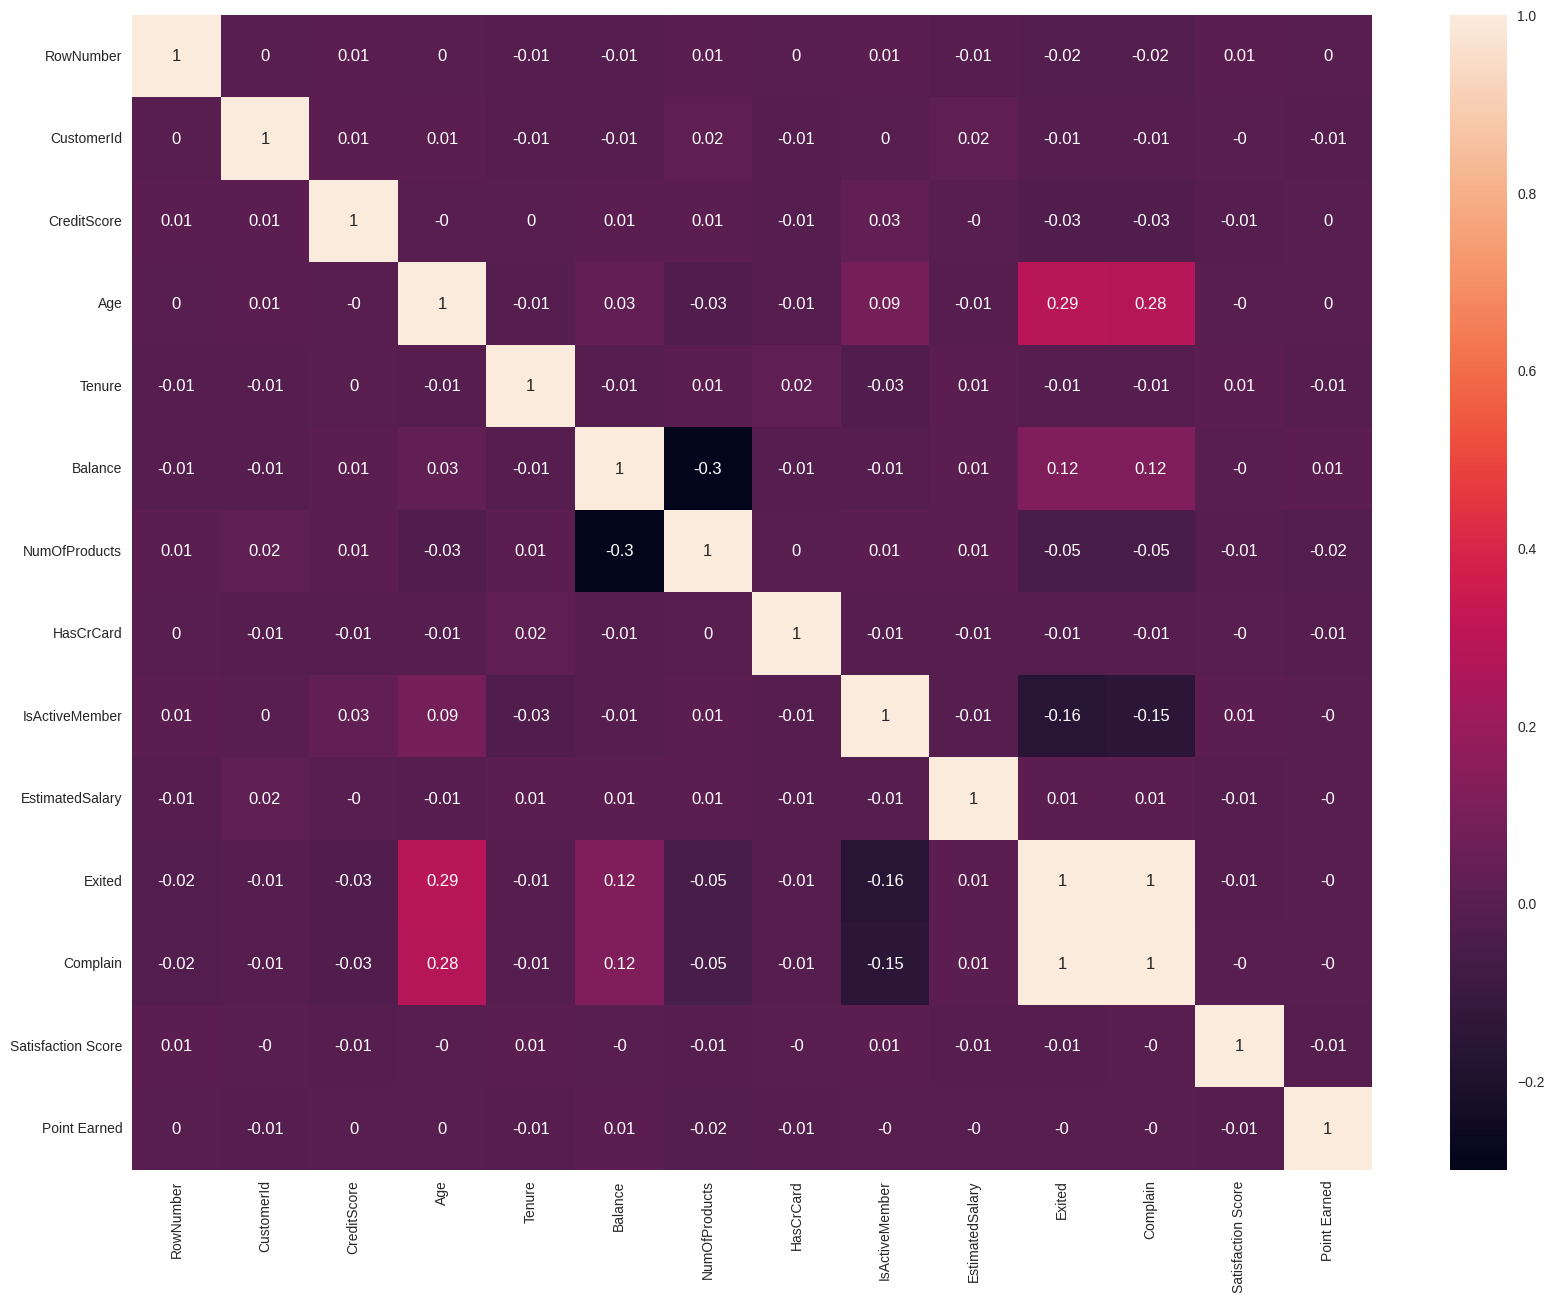

In [ ]:
# verifying the correlation between variables
corr = data.corr(numeric_only = True).round(2)
plt.figure(figsize = (20,15))
sns.heatmap(corr, annot = True)

Here, looking at the correlation of our variables, we can see that we have 100% correlation between the target variables and the Complain variable, so let's eliminate the Complain variable.

In [ ]:
# drop Complain variable
data = data.drop(['Complain'], axis = 'columns')

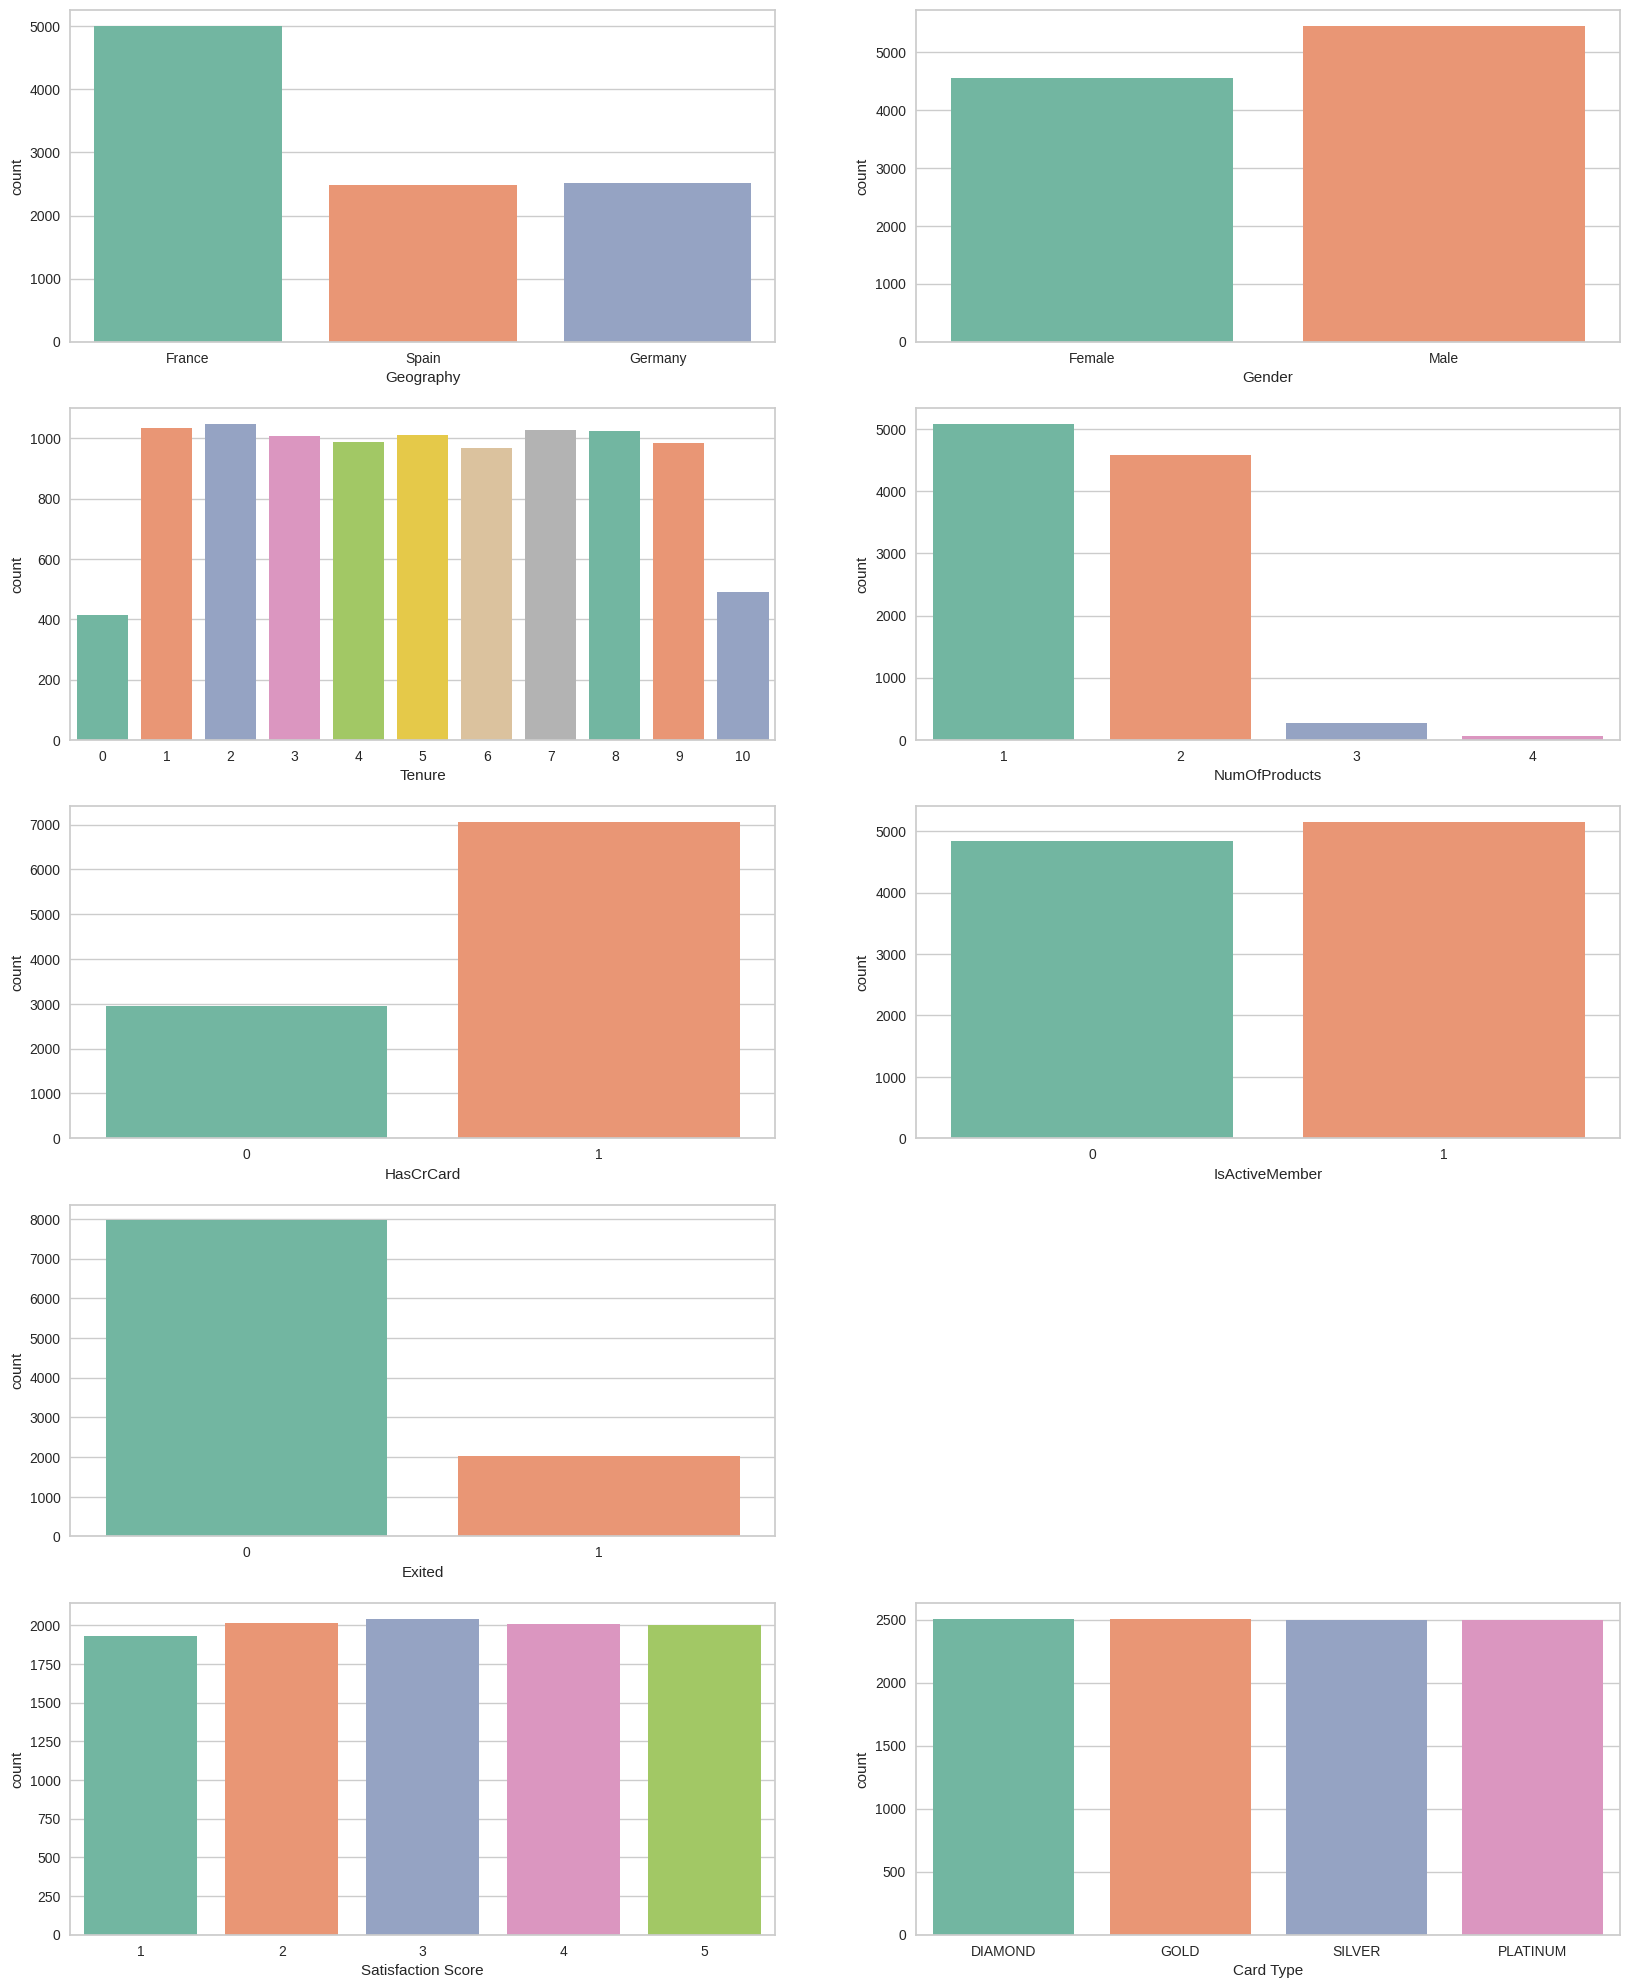

In [ ]:
# visualization categorical variables
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
# variable Geography
sns.countplot(x = 'Geography', palette = 'Set2', data = data)

plt.subplot(5, 2, 2)
# variable Gender
sns.countplot(x = 'Gender', palette = 'Set2', data = data)

plt.subplot(5, 2, 3)
# variable Tenure
sns.countplot(x = 'Tenure', palette = 'Set2', data = data)

plt.subplot(5, 2, 4)
# variable NumOfProducts
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = data)

plt.subplot(5, 2, 5)
# variable HasCrCard
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = data)

plt.subplot(5, 2, 6)
# variable IsActiveMember
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = data)

plt.subplot(5, 2, 7)
# variable Exited
sns.countplot(x = 'Exited', palette = 'Set2', data = data)

plt.subplot(5, 2, 9)
# variable Satisfaction Score
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = data)

plt.subplot(5, 2, 10)
# variable Card Type
sns.countplot(x = 'Card Type', palette = 'Set2', data = data)
plt.show()

Looking at our categorical variables we can see that most of our variables are well distributed, we can see that our customers are mostly from France, with the gender variable well distributed, and usually with 1 or 2 products

<Axes: xlabel='Point Earned', ylabel='Count'>

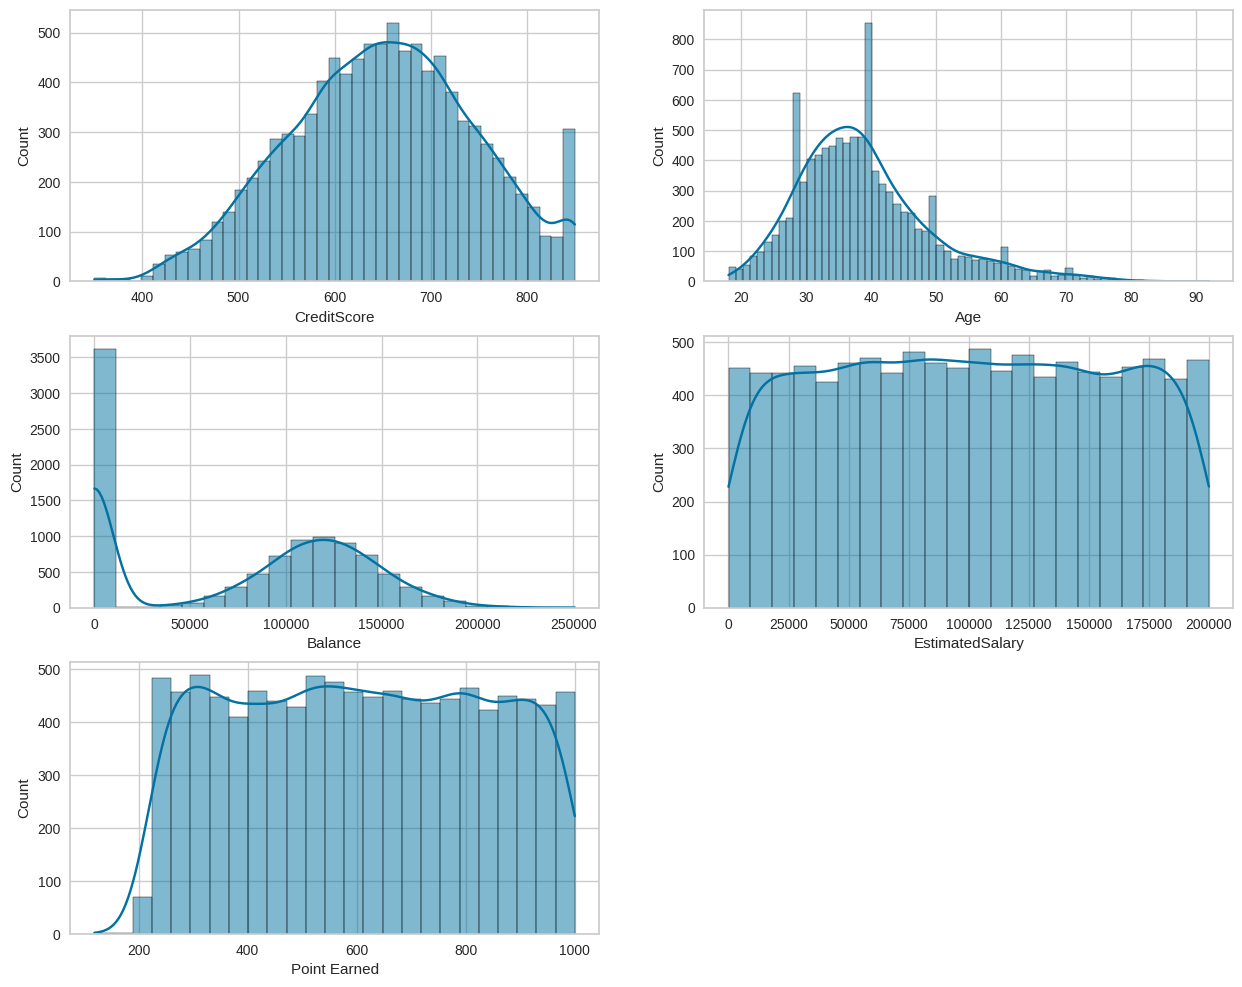

In [ ]:
# visualization numerical variables
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
# variable CreditScore
sns.histplot(x = data['CreditScore'], kde = True)

plt.subplot(3, 2, 2)
# variable Age
sns.histplot(x = data['Age'], kde = True)

plt.subplot(3, 2, 3)
# variable Balance
sns.histplot(x = data['Balance'], kde = True)

plt.subplot(3, 2, 4)
# variable EstimatedSalary
sns.histplot(x = data['EstimatedSalary'], kde = True)

plt.subplot(3, 2, 5)
# variable Point Earned
sns.histplot(x = data['Point Earned'], kde = True)

Looking at our numerical variables we can see that most of the variables are well balanced, like the estimated salary we can see that we have practically the same number of people for each salary range, the same thing for the PointEarned variable, when we look at the variable CreditScore and Age we can see that they have practically the same behavior, a non-perfect normal distribution, and when we look at the balance variable we can see that most of our data are from people who don't have money in their accounts, and those who have it are fine balanced.

<Axes: xlabel='Point Earned'>

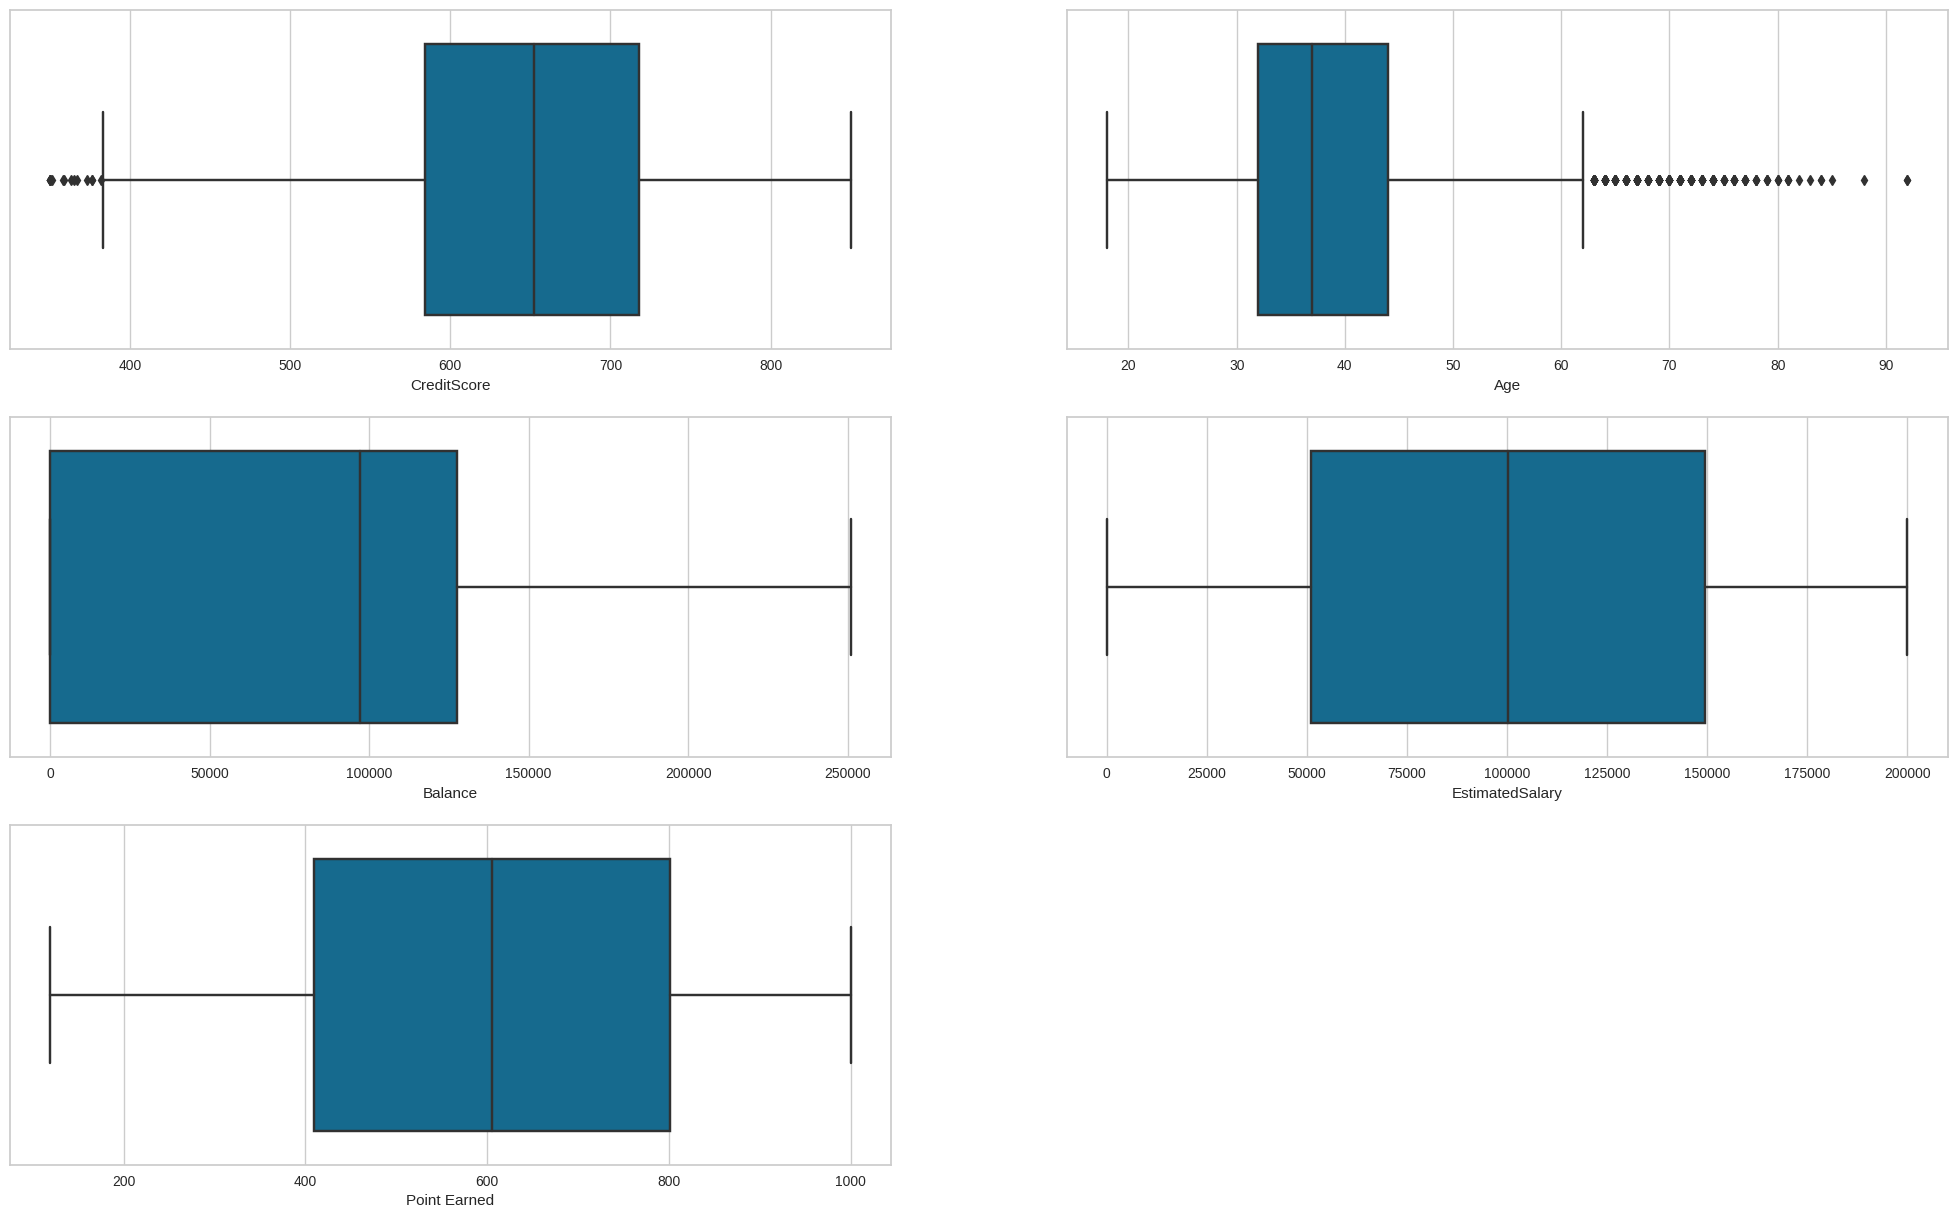

In [ ]:
# visualization use boxplot to see outliers
plt.figure(figsize = (25, 15))

plt.subplot(3, 2, 1)
# boxplot CreditScore
sns.boxplot(x=data["CreditScore"])

plt.subplot(3, 2, 2)
# boxplot Age
sns.boxplot(x=data["Age"])

plt.subplot(3, 2, 3)
# boxplot Balance
sns.boxplot(x=data["Balance"])

plt.subplot(3, 2, 4)
# boxplot EstimatedSalary
sns.boxplot(x=data["EstimatedSalary"])

plt.subplot(3, 2, 5)
# boxplot Point Earned
sns.boxplot(x=data["Point Earned"])

Looking at the boxplots of our continuous variables we can see that we have few outliers, for now we will leave them.

# Model Building

## Data Preprocessing

In [ ]:
# eliminate the variables that will not be used in the model
# RowNumber, CustomerID, and Surname
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
# transform our categorical variables into numerical variable
# use the one hot label encoder
hot = pd.get_dummies(data[['Geography', 'Gender', 'Card Type']])

In [ ]:
data = pd.concat([data, hot], axis = 1)
data = data.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

In [ ]:
# separating into features variables and target variable
x = data.drop('Exited', axis = 1)
print(x.columns)
x = x.values
y = data['Exited']

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')


In [ ]:
# feature scaling use StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)

In [ ]:
# split data intu train and test, use 30% of our data to test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size = 0.3, random_state = 0)

In [ ]:
# balancing classes use oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train, y_train = ros.fit_resample(x_train, y_train)

## Decision Tree

In [ ]:
# we will test Entropy and Gini calculations
# we are applying GridSearch to check which are the best metrics to use
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(x_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  7
Max Nvl:  11
Algorithm:  gini
Score:  0.8452724924850289


0.7703333333333333

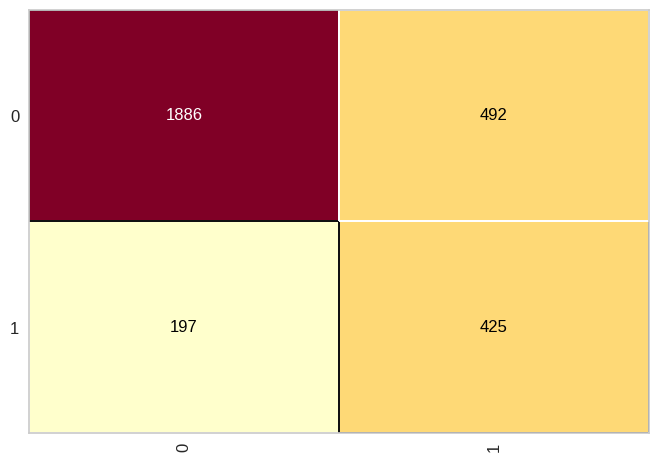

In [ ]:
# running decision tree
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(x_train, y_train)
previsoes = decision_tree.predict(x_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
score_tree = 0.7703333333333333

In [ ]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      2378
           1       0.46      0.68      0.55       622

    accuracy                           0.77      3000
   macro avg       0.68      0.74      0.70      3000
weighted avg       0.81      0.77      0.78      3000



In [ ]:
f = bz2.BZ2File('/content/drive/MyDrive/Sampel Data/Final Project/Pbz2 file/Model/decision_tree.pbz2', 'w')
pkl.dump(decision_tree, f)

In [ ]:
# checking the most important variables of the model
columns = data.drop('Exited', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

Age                   0.303503
NumOfProducts         0.180704
Balance               0.130453
EstimatedSalary       0.088313
CreditScore           0.068321
Point Earned          0.063447
IsActiveMember        0.043320
Geography_Germany     0.032482
Tenure                0.026237
Satisfaction Score    0.014332
Geography_Spain       0.009280
Gender_Female         0.009011
Card Type_SILVER      0.007199
Gender_Male           0.005021
HasCrCard             0.004922
Geography_France      0.004032
Card Type_GOLD        0.003420
Card Type_PLATINUM    0.003140
Card Type_DIAMOND     0.002861
dtype: float64

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(x_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.8938944240398257
Mín Split:  3
Max Nvl:  11


0.8396666666666667

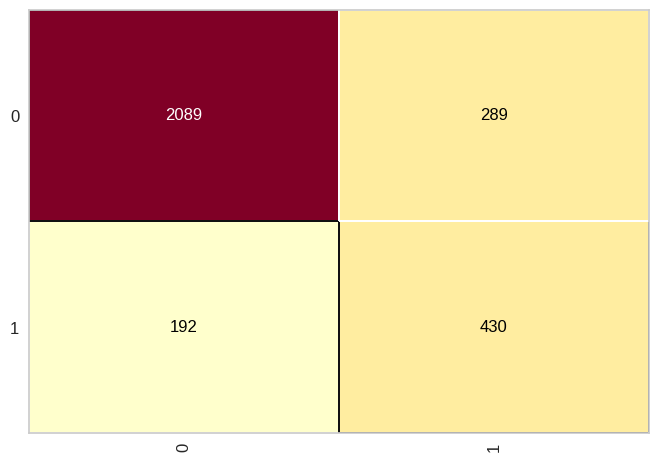

In [ ]:
# running random forest
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 6, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(x_train, y_train)
previsoes = random_forest.predict(x_test)

cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2378
           1       0.60      0.69      0.64       622

    accuracy                           0.84      3000
   macro avg       0.76      0.78      0.77      3000
weighted avg       0.85      0.84      0.84      3000



In [ ]:
score_random = 0.8396666666666667

In [ ]:
f = bz2.BZ2File('/content/drive/MyDrive/Sampel Data/Final Project/Pbz2 file/Model/random_forest.pbz2', 'w')
pkl.dump(random_forest, f)

In [ ]:
# checking the most important variables of the model
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Age                   0.278440
NumOfProducts         0.168072
Balance               0.106117
Point Earned          0.072649
CreditScore           0.071641
EstimatedSalary       0.070182
IsActiveMember        0.040088
Tenure                0.040065
Geography_Germany     0.036419
Satisfaction Score    0.026732
Geography_France      0.014228
Gender_Female         0.013662
Gender_Male           0.012202
HasCrCard             0.009096
Geography_Spain       0.008881
Card Type_SILVER      0.008345
Card Type_DIAMOND     0.008036
Card Type_GOLD        0.007634
Card Type_PLATINUM    0.007510
dtype: float64

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(x_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8794770773638969)

0.7743333333333333

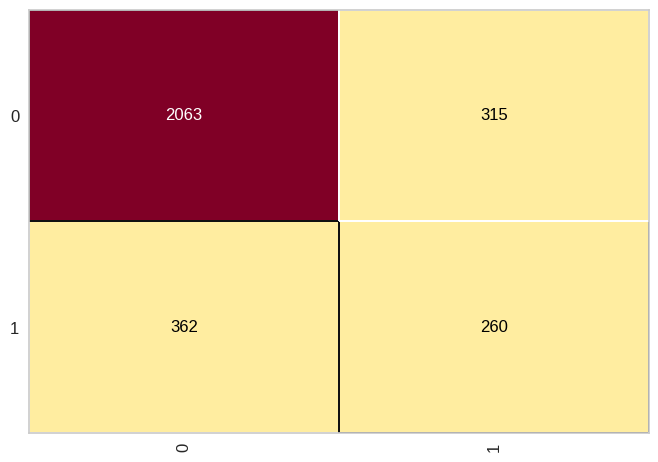

In [ ]:
# running k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
previsoes = knn.predict(x_test)

cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2378
           1       0.45      0.42      0.43       622

    accuracy                           0.77      3000
   macro avg       0.65      0.64      0.65      3000
weighted avg       0.77      0.77      0.77      3000



In [ ]:
score_knn = 0.7743333333333333

In [ ]:
f = bz2.BZ2File('/content/drive/MyDrive/Sampel Data/Final Project/Pbz2 file/Model/knn.pbz2', 'w')
pkl.dump(knn, f)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Membuat objek SVC
svm = SVC()

# Daftar nilai yang akan diuji untuk parameter C dan kernel
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Membuat objek GridSearchCV
grid = GridSearchCV(svm, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

# Melakukan pencarian parameter terbaik
grid.fit(x_train, y_train)

# Mengakses parameter terbaik dan skor akurasi terbaik
best_params = grid.best_params_
best_score = grid.best_score_

print("Parameter terbaik:", best_params)
print("Skor akurasi terbaik:", best_score)

Parameter terbaik: {'C': 10, 'kernel': 'rbf'}
Skor akurasi terbaik: 0.8502865329512894


In [ ]:
# running support vector machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Membuat objek SVC dengan parameter yang sesuai
svm = SVC(kernel='rbf', C=10)

# Melatih model SVM dengan data pelatihan
svm.fit(x_train, y_train)

# Membuat prediksi pada data uji
y_pred = svm.predict(x_test)

# Menghitung matriks kebingungan (confusion matrix)
cm = confusion_matrix(y_test, y_pred)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

Confusion Matrix:
[[1989  389]
 [ 215  407]]
Accuracy: 0.7986666666666666


In [ ]:
SVM = 0.7986666666666666

In [ ]:
f = bz2.BZ2File('/content/drive/MyDrive/Sampel Data/Final Project/Pbz2 file/Model/SVM.pbz2', 'w')
pkl.dump(knn, f)

## LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Membuat objek LightGBM Classifier
lgbm = lgb.LGBMClassifier()

# Daftar nilai yang akan diuji untuk parameter n_neighbors
param_grid = {
    'n_neighbors': list(range(1, 10))
}

# Membuat objek GridSearchCV
grid = GridSearchCV(lgbm, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

# Melakukan pencarian parameter terbaik
grid.fit(x_train, y_train)

# Mengakses parameter terbaik dan skor akurasi terbaik
best_params = grid.best_params_
best_score = grid.best_score_

print("Parameter terbaik:", best_params)
print("Skor akurasi terbaik:", best_score)

[LightGBM] [Warning] Unknown parameter: n_neighbors
[LightGBM] [Warning] Unknown parameter: n_neighbors
[LightGBM] [Info] Number of positive: 5584, number of negative: 5584
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 11168, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Parameter terbaik: {'n_neighbors': 1}
Skor akurasi terbaik: 0.8754477077363897


In [ ]:
# running lightgbm
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score

# Membuat objek LightGBM Classifier
lgbm = lgb.LGBMClassifier()

# Melatih model LightGBM dengan data pelatihan
lgbm.fit(x_train, y_train)

# Membuat prediksi pada data uji
y_pred = lgbm.predict(x_test)

# Menghitung matriks kebingungan (confusion matrix)
cm = confusion_matrix(y_test, y_pred)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

[LightGBM] [Info] Number of positive: 5584, number of negative: 5584
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 11168, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
[[2042  336]
 [ 177  445]]
Accuracy: 0.829


In [ ]:
lgbm = 0.829

In [ ]:
f = bz2.BZ2File('/content/drive/MyDrive/Sampel Data/Final Project/Pbz2 file/Model/lgbm.pbz2', 'w')
pkl.dump(knn, f)

## Checking the results

In [ ]:
Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Support_Vector_M = {'Model':'SVM',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':SVM}

LightGBM = {'Model':'LGBM',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':lgbm}


resume = pd.DataFrame({'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'KNN':pd.Series(KNN_dict_v2),
                       'SVM':pd.Series(Support_Vector_M),
                       'LGBM':pd.Series(LightGBM),
                      })

resume

,Decision Tree,Random Forest,KNN,SVM,LGBM
Model,Decision Tree,Random Forest,KNN,SVM,LGBM
Scaling,Normal Data,Normal Data,Normal,Normal,Normal
Type,Gini,Gini,-,-,-
Precision,0.770333,0.839667,0.774333,0.798667,0.829
